# Followed By Trigger Language Analysis

This analysis has been done in context of the following constraints:

-  FollowedBy Classifier is a citation level classifier - As such, given a citation, it is able to classify it as 'Followed By' or 'Not Followed By'

-  A citation is followed if it is treated with one of the letters in ('#&ff', '#ff', '&ff', 'ff', '#&f', '#f', '&f', 'f'). However, for the purpose of classifier, all these letters are treated the same. 

Trigger language is captured using a group where each group may have fragments scattered across different paragraphs within a document. Referenced cites may appear in the trigger language paragraphs or outside of such paragraphs. Multiple cites may be referenced within a fragment. A paragraph with trigger language may have collection of cites where a cite may have been followed but not all the cites.

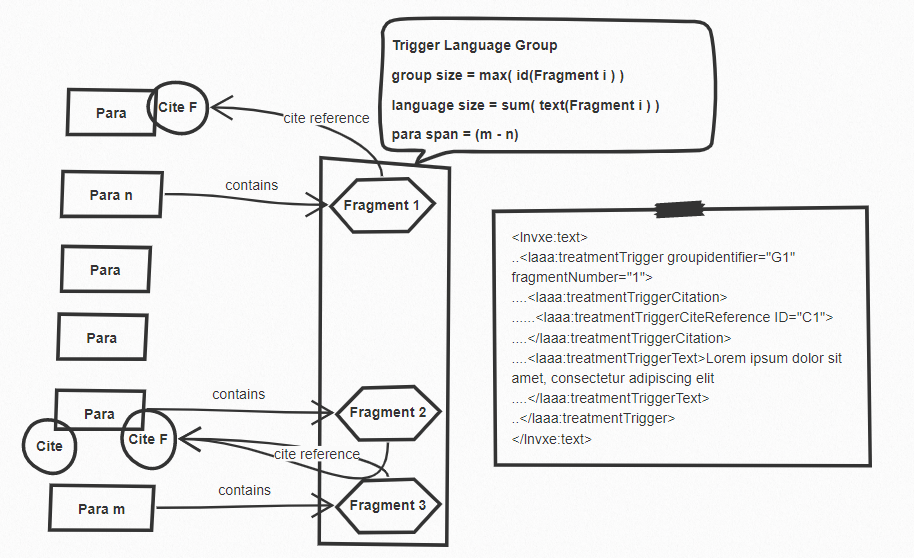

## Extract data from followed-by trigger language files
Files with trigger laguage are located in \\\\legal.regn.net\DAY\Shares\Themis\GoldenFTraining\HasTriggerLanguage
<br/>
Files that have no trigger language are located in \\\\legal.regn.net\DAY\Shares\Themis\GoldenFTraining\NoTriggerLanguage
<br/>

In [ ]:
import glob
tl_files = glob.glob(r'\\legal.regn.net\DAY\Shares\Themis\GoldenFTraining\HasTriggerLanguage\*.xml')
nt_files = glob.glob(r'\\legal.regn.net\DAY\Shares\Themis\GoldenFTraining\NoTriggerLanguage\*.xml')

In [ ]:
import sys
import os
from pathlib import Path

cwd = os.getcwd()
source_path = os.path.join(Path(cwd).parent, 'Source', 'Python')
sys.path.append(source_path)

In [ ]:
from trigger_language_analysis import extract_trigger_language

### Parse document using lxml etree

### Description of DataFrame Columns 

<table style="float:left">
        <tr>
            <th style="text-align:left;">Name</td>
            <th style="text-align:left;">Description</td>
        </tr>
        <tr>
            <td style="text-align:left;">filename</td>
            <td style="text-align:left;">case document file name</td>
        </tr>
        <tr>
            <td style="text-align:left;">lni</td>
            <td style="text-align:left;">lni</td>
        </tr>
        <tr>
            <td style="text-align:left;">para_element</td>
            <td style="text-align:left;">xml with root element &lt;lnvxe:text&gt;</td>
        </tr>
        <tr>
            <td style="text-align:left;">para_text</td>
            <td style="text-align:left;">paragraph text</td>
        </tr>
        <tr>
            <td style="text-align:left;">trgr_element</td>
            <td style="text-align:left;">xml with root element &lt;laaa:treatmentTrigger&gt;</td>
        </tr>
        <tr>
            <td style="text-align:left;">trgr_language</td>
            <td style="text-align:left;">text contained in element &lt;laaa:treatmentTrigger&gt;</td>
        </tr>
        <tr>
            <td style="text-align:left;">trgr_language_len</td>
            <td style="text-align:left;">length of text contained in element &lt;laaa:treatmentTrigger&gt;</td>
        </tr>
        <tr>
            <td style="text-align:left;">cnt_cite_in_para</td>
            <td style="text-align:left;">number of &lt;lnci:cite&gt; elements within para_element</td>
        </tr>
        <tr>
            <td style="text-align:left;">cnt_cite_in_para_anaphref</td>
            <td style="text-align:left;">number of &lt;lnci:cite&gt; elements within para_element that have anaphref attribute</td>
        </tr>
        <tr>
            <td style="text-align:left;">cnt_f_letter_cite_in_para</td>
            <td style="text-align:left;">number of &lt;lnci:cite&gt; elements within para_element that have letter f</td>
        </tr>
        <tr>
            <td style="text-align:left;">cnt_nonf_letter_cite_in_para</td>
            <td style="text-align:left;">number of &lt;lnci:cite&gt; elements within para_element that have treatment letter other than f</td>
        </tr>        
        <tr>
            <td style="text-align:left;">cnt_cite_referenced</td>
            <td style="text-align:left;">number of &lt;laaa:treatmentTriggerCiteReference&gt; elements within &lt;laaa:treatmentTrigger&gt;</td>
        </tr>
        <tr>
            <td style="text-align:left;">cnt_cite_referenced_in_para</td>
            <td style="text-align:left;">number of &lt;lnci:cite&gt; elements within para_element that have been referenced using &lt;laaa:treatmentTriggerCiteReference&gt; elements</td>
        </tr>
        <tr>
            <td style="text-align:left;">cites_in_para</td>
            <td style="text-align:left;">cite list: [(Cite ID, Letter, Anaphoric ID)]</td>
        </tr>
        <tr>
            <td style="text-align:left;">cite_referenced</td>
            <td style="text-align:left;">Ids of cite referenced by &lt;laaa:treatmentTriggerCiteReference&gt; elements within &lt;laaa:treatmentTrigger&gt;</td>
        </tr>
        <tr>
            <td style="text-align:left;">percent_f</td>
            <td style="text-align:left;">document level percentage of f letters</td>
        </tr>
</table>




### Process trigger files 
Capture cite information and trigger language details per paragraph

In [ ]:
%%time

trigger_language_list = []

for i, file in enumerate(tl_files, start=1):
    with open(file, "r", encoding="utf-8") as f:
        content = f.read()

        try:
            document_language_list = extract_trigger_language(os.path.basename(f.name), content)
            trigger_language_list.extend(document_language_list)
            print(i, os.path.basename(f.name), 'xml ok', sep=':')
        except Exception as e:
            print(i, os.path.basename(f.name), 'xml error', e, sep=':')

### Create a DataFrame with file data

In [ ]:
import numpy as np
import pandas as pd

pd.set_option('max_colwidth', 80)

columns = ['filename', 
           'lni', 
           'para_id', 
           'para_element', 
           'para_text', 
           'trgr_element', 
           'trgr_language',
           'contains_mandatory_f_language',
           'contains_may_support_f_language',
           'trgr_language_word_index',
           'word_dist_to_cite',
           'para_dist_to_cite',
           'group_id', 
           'fragment_id', 
           'editor_id', 
           'cite_referenced',
           'trgr_cite_is_closest',
           'cites_in_para',
           'cnt_cite_in_para', 
           'cnt_cite_in_para_anaphref', 
           'cnt_f_letter_cite_in_para', 
           'cnt_nonf_letter_cite_in_para',
           'cnt_cite_referenced',
           'cnt_cite_referenced_in_para',
           'percent_f',
           'cnt_words']

df = pd.DataFrame(trigger_language_list, columns=columns, dtype=int)
df['trgr_language_len'] = df['trgr_language'].apply(len)
df

### Plot Number of Documents with Treatment vs No Treatment

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

x = ['Treatment', 'No Treatment']
documents = [len(tl_files), len(nt_files)]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, documents, color='orange')
plt.ylabel("Number of Documents")
plt.title("Documents Processed")

fig = plt.gcf()
fig.set_size_inches(12,5)

plt.xticks(x_pos, x)

plt.show()

### Distribution of Trigger Language
A document consists of multiple paragraphs represented by &lt;lnvxe:text&gt; element. Trigger language may span multiple paragraphs. To capture trigger language across multiple paragraphs, a group identifier is used to bundle treatment language fragments - e.g. BL01666283.XML

<laaa:treatmentTrigger groupIdentifier="I7SGF01" guid="I5KS01" totalFragments="2" fragmentNumber="1">

There may also be instances when multiple fragments may appear within a &lt;lnvxe:text&gt; element - e.g. BL01258142.XML

A given document may have more than one group of trigger language.

In [ ]:
df_group = df.query('trgr_language != ""').groupby(['filename'])['group_id'].agg('nunique').to_frame('group_count')
hist = df_group.hist(column="group_count", bins=20, figsize=(12,5))
hist[0][0].set_ylabel('Number of Documents')
hist[0][0].set_xlabel('Number of Trigger Language Groups')
hist[0][0].set_title('Distribution of Trigger Language Groups')

## distance (words) from citation to trigger text
- minimum
- maximum
- average
- 90th percentile
- histogram

In [ ]:
# create a dataframe of only the trigger language fragments, and infer the object types
df_trgr = df.query('trgr_language != ""').infer_objects()

In [ ]:
df_group = df_trgr[['word_dist_to_cite']]
df_stats = df_group.quantile([0,.5,.9,.95,.99,1]).rename(index={0:'min',0.5:'median',1.0:'max'})
display(df_stats.append(df_group.mean().rename('mean')))

bp = df_group.rename(
    columns={'word_dist_to_cite':''}).boxplot(showmeans=True, whis=[10,90], figsize=(20,5), vert=False, widths=.75)
bp.set_title('Trigger Language Fragment distance from Citation (words)')

hist = df_group.hist(bins=60, figsize=(16,5))
hist[0][0].set_ylabel('Number of Trigger Language fragments')
hist[0][0].set_xlabel('words')
ax = hist[0][0].set_title('Distribution of trigger language fragment distance from citation')

In [ ]:
df_group = df_trgr[['word_dist_to_cite']]
quartiles = df_group.quantile([.25,.75])
iqr = (quartiles.loc[.75] - quartiles.loc[.25])['word_dist_to_cite']
df_group=df_group[df_group['word_dist_to_cite'] < 1.5 * iqr]
df_stats = df_group.quantile([0,.5,.9,.95,.99,1]).rename(index={0:'min',0.5:'median',1.0:'max'})
display(df_stats.append(df_group.mean().rename('mean')))

bp = df_group.rename(
    columns={'word_dist_to_cite':''}).boxplot(showmeans=True, whis=[10,90], figsize=(20,5), vert=False, widths=.75)
bp.set_title('Trigger Language Fragment distance from Citation (words) - outliers removed')

hist = df_group.hist(bins=60, figsize=(16,5))
hist[0][0].set_ylabel('Number of Trigger Language fragments')
hist[0][0].set_xlabel('words')
ax = hist[0][0].set_title('Distribution of trigger language fragment distance from citation - outliers removed')

In [ ]:
df_group = df_trgr.groupby('group_id')[['word_dist_to_cite']].min()
df_stats = df_group.quantile([0,.5,.9,.95,.99,1]).rename(index={0:'min',0.5:'median',1.0:'max'})
display(df_stats.append(df_group.mean().rename('mean')))

bp = df_group.rename(
    columns={'word_dist_to_cite':''}).boxplot(showmeans=True, whis=[10,90], figsize=(20,5), vert=False, widths=.75)
bp.set_title('Trigger Language Group distance from Citation (words)')

hist = df_group.hist(bins=60, figsize=(16,5))
hist[0][0].set_ylabel('Number of Trigger Language Groups')
hist[0][0].set_xlabel('words')
ax = hist[0][0].set_title('Distribution of trigger language group distance from citation')

In [ ]:
df_group = df_trgr.groupby('group_id')[['word_dist_to_cite']].min()
quartiles = df_group.quantile([.25,.75])
iqr = (quartiles.loc[.75] - quartiles.loc[.25])['word_dist_to_cite']
df_group=df_group[df_group['word_dist_to_cite'] < 1.5 * iqr]
df_stats = df_group.quantile([0,.5,.9,.95,.99,1]).rename(index={0:'min',0.5:'median',1.0:'max'})
display(df_stats.append(df_group.mean().rename('mean')))

bp = df_group.rename(
    columns={'word_dist_to_cite':''}).boxplot(showmeans=True, whis=[10,90], figsize=(20,5), vert=False, widths=.75)
bp.set_title('Trigger Language Group distance from Citation (words) - outliers removed')

hist = df_group.hist(bins=40, figsize=(20,5))
hist[0][0].set_ylabel('Number of Trigger Language groups')
hist[0][0].set_xlabel('words')
ax = hist[0][0].set_title('Distribution of trigger language group distance from citation - outliers removed')

## percent of time the trigger text and citation appear
- in the same paragraph
- 1 paragraph apart
- 2 paragraphs apart
- 3 or more paragraphs apart

In [ ]:
df_group = df_trgr.groupby('group_id')[['para_dist_to_cite']].min()
df_group = df_group.groupby('para_dist_to_cite')['para_dist_to_cite'].agg(['count'])
def label_func(pct, data):
    val = int(pct / 100.0 * sum(data) + .5)
    return f'{pct:.2f}% ({val})'
def sum_tail(data, threshold):
    tail = data.loc[threshold:].sum().rename(f'{threshold}+')
    return data.loc[:threshold - 1].append(tail)
df_group = sum_tail(df_group, 3)
ax = df_group.plot.pie(y='count',
                       autopct=lambda pct: label_func(pct, df_group['count']),
                       figsize=(6, 6),
                       textprops={'size':'large'})
ax.set_title('Trigger Language Group distance from Citation (paragraphs)')
ax.legend(['same para as cite',
           '1 para from cite',
           '2 paras from cite',
           '3 or more from cite'])
_ = ax.set_ylabel('')

## percent of time the trigger text appears in
- 1 paragraph
- 2 or more paragraphs

In [ ]:
df_group = df_trgr.groupby('group_id')['para_id'].agg(['nunique'])
df_group = df_group.groupby('nunique')['nunique'].agg(['count'])
df_group = sum_tail(df_group, 3)
ax = df_group.plot.pie(y='count',
                       autopct=lambda pct: label_func(pct, df_group['count']),
                       figsize=(6, 6),
                       textprops={'size':'large'})
ax.set_title('Trigger Language Paragraph Fragmentation')
ax.legend(['all trigger text within 1 para',
           'trigger text in 2 paras',
           'trigger text in 3 or more paras'])
_ = ax.set_ylabel('')

## percent of time trigger text is assigned to (any of the) closest citations

In [ ]:
df_group = df_trgr.groupby('group_id')[['trgr_cite_is_closest']].any()
df_group = df_group.groupby('trgr_cite_is_closest')['trgr_cite_is_closest'].agg(['count'])
ax = df_group.plot.pie(y='count',
                       labels=['not closest cite','closest cite'],
                       autopct=lambda pct: label_func(pct, df_group['count']),
                       figsize=(6, 6),
                       textprops={'size':'large'})
ax.set_title('Trigger Language Group assigned to closest citation (by words)')
_ = ax.set_ylabel('')

## percentage of time trigger text contains
- "mandatory" followed by language
- "might be" followed by language

In [ ]:
df_group = df_trgr.groupby('group_id')[['contains_may_support_f_language','contains_mandatory_f_language']].any()
may_support = df_group.groupby('contains_may_support_f_language')['contains_may_support_f_language'].agg('count')
mandatory = df_group.groupby('contains_mandatory_f_language')['contains_mandatory_f_language'].agg('count')
df_group = pd.DataFrame([may_support, mandatory]).T
ax = df_group.plot.pie(subplots=True,
                       labels=['no', 'yes'],
                       autopct=lambda pct: label_func(pct, df_group['contains_mandatory_f_language']),
                       figsize=(12, 12),
                       textprops={'size': 'large'})
ax[0].set_title('Contains "Might Be" f-language')
ax[0].set_ylabel('')
ax[1].set_title('Contains "Mandatory" f-language')
ax[1].set_ylabel('')
ax[0].get_legend().remove()
_ = ax[1].legend(['does not contain language', 'contains language'])

In [ ]:
df_group = df.query('trgr_language != ""').groupby(['group_id'])['fragment_id'].agg('max').to_frame('fragment_count').astype('float64')
hist = df_group.hist(column="fragment_count", bins=40, figsize=(12,6))
hist[0][0].set_ylabel('Number of Trigger Language Groups')
hist[0][0].set_xlabel('Number of Fragments')
hist[0][0].set_title('Distribution of Trigger Language Fragments')

df0 = df.query('group_id != ""').groupby(['group_id'])['para_id'].agg('min').astype(float).to_frame('para_min').reset_index()
df1 = df.query('group_id != ""').groupby(['group_id'])['para_id'].agg('max').astype(float).to_frame('para_max').reset_index()
df2 = df.query('group_id != ""').groupby(['group_id'])['fragment_id'].agg('max').astype(float).to_frame('fragments').reset_index()
df_span = df0
df_span['para_max'] = df1['para_max']
df_span['span'] = df_span['para_max'] - df_span['para_min'] + 1
df_span['fragments'] = df2['fragments'].astype(float)
df_span.plot.scatter(x='fragments', y='span', title="Scatter Plot: Paragraph span for trigger language group fragments", figsize=(12,6));

In [ ]:
trgr_data = pd.DataFrame(df.query('trgr_language != ""'))
trgr_data["language_size"] = trgr_data["trgr_language"].str.len()
size_data = trgr_data.groupby(['group_id'])['language_size'].agg('sum').to_frame('language_size')
hist = size_data.hist(column="language_size", bins=40, figsize=(12,6))
hist[0][0].set_ylabel('Number of Trigger Language Groups')
hist[0][0].set_xlabel('Language Size (characters)')
hist[0][0].set_title('Distribution of Trigger Language Size ')

### Distribution of Trigger Language by Editor
Graphs below depict statistics on language size and number of documents processed by each editor

In [ ]:
trgr_data = pd.DataFrame(df.query('trgr_language != ""'))
trgr_data["language_size"] = trgr_data["trgr_language"].str.len()
lang_data = trgr_data[['editor_id','language_size', 'group_id']]
size_data = lang_data.groupby(['group_id'])['language_size'].agg('sum').to_frame('language_size')
editor_data = lang_data.groupby(['group_id'])['editor_id'].agg('max').to_frame('editor_id')
editor_data['language_size'] = size_data['language_size']
editor_data = editor_data.reset_index().drop(columns=['group_id']).groupby(['editor_id']).agg(['min','max', 'mean', 'median'])
ax = editor_data.plot.bar(figsize=(12,5), title="Statistics for trigger language group size by Editor")
ax.set_ylabel('Language size (characters)')
ax.set_xlabel('Editor Alias')
doc_data = trgr_data.groupby(['filename'])['editor_id'].agg('max').to_frame().groupby(['editor_id']).size().to_frame('docs')
ax = doc_data.plot.bar(figsize=(12,5), legend=False)
ax.set_ylabel('Number of Documents Processed')
ax.set_xlabel('Editor Alias')

### Ditribution of followed by cites in a document
Some documents have more than 1 citations that are treated with letter 'f'. For example BL01505881.XML has 6 citations that have been followed:

- Mielo v. Steak &apos;n Shake Operations, Inc.
- Hayes v. Wal-Mart Stores, Inc.
- Marcus v. BMW of N. Am., LLC
- In re Modafinil Antitrust Litig.
- Dewey v. Volkswagen Aktiengesellschaft
- In re Modafinil Antitrust Litig.

In [ ]:
df_group = df.groupby(['filename'])['cnt_f_letter_cite_in_para'].agg('sum').to_frame('cites_with_f_letter')
hist = df_group.hist(column="cites_with_f_letter", bins=30, figsize=(12,6))
hist[0][0].set_ylabel('Number of Documents')
hist[0][0].set_xlabel('Number of Cites with f Letter')
hist[0][0].set_title('Distribution of FollowedBy Cites ')

### Distribution of followed by cites outside paragraphs with trigger language
Some citations with followed by letter appear outside of paragraphs that have trigger language e.g. BL01258142.XML

In [ ]:
df_group = df.query('trgr_language == ""').groupby(['filename'])['cnt_f_letter_cite_in_para'].agg('sum').to_frame('cites_with_f_letter')
hist = df_group.hist(column="cites_with_f_letter", bins=30, figsize=(12,6))
hist[0][0].set_ylabel('Number of Documents')
hist[0][0].set_xlabel('Number of Cites with f Letter')
hist[0][0].set_title('Distribution of FollowedBy Cites outside paragraphs with trigger language ')

### Distribution of followed by letter percentage 

In [ ]:
df['percent_f_float'] = df['percent_f'].apply(float)
df_group = df.groupby(['filename'])['percent_f_float'].agg('max').to_frame('doc_percent_f')
hist = df_group.hist(column="doc_percent_f", bins=20, figsize=(12,6))
hist[0][0].set_ylabel('Number of Documents')
hist[0][0].set_xlabel('Percentage of Cites with f Letter')
hist[0][0].set_title('Distribution of FollowedBy Cites (%) ')

### Visualization of  cite infromation and trigger language embedded within a para 
Trigger language has reference to cites as shown in the xml below. 

<laaa:treatmentTriggerCiteReference ID="I5VW15DW2N1R7H0JK0000400"/>

Actual cite element (or anaphoric reference to cite) corresponding to ID may be in the same para as trigger language or it could be in another para.

In [ ]:
import matplotlib.pyplot as plt

columns = ['cnt_cite_in_para', 'cnt_cite_referenced', 'cnt_cite_referenced_in_para', 'cnt_f_letter_cite_in_para', 'cnt_nonf_letter_cite_in_para']
df0 = df.groupby(['filename','para_id'])[columns[0]].agg('max').astype(float).to_frame(columns[0]).reset_index()
df1 = df.groupby(['filename','para_id'])[columns[1]].agg('sum').astype(float).to_frame(columns[1]).reset_index()
df2 = df.groupby(['filename','para_id'])[columns[2]].agg('sum').astype(float).to_frame(columns[2]).reset_index()
df3 = df.groupby(['filename','para_id'])[columns[3]].agg('sum').astype(float).to_frame(columns[3]).reset_index()
df4 = df.groupby(['filename','para_id'])[columns[4]].agg('sum').astype(float).to_frame(columns[4]).reset_index()
df_cite_counts = df0
df_cite_counts[columns[1]] = df1[columns[1]]
df_cite_counts[columns[2]] = df2[columns[2]]
df_cite_counts[columns[3]] = df3[columns[3]]
df_cite_counts[columns[4]] = df4[columns[4]]
cnt_partial_ref  = df_cite_counts.query('cnt_cite_referenced != 0 and cnt_cite_referenced != cnt_cite_referenced_in_para')
cnt_complete_ref = df_cite_counts.query('cnt_cite_referenced != 0 and cnt_cite_referenced == cnt_cite_referenced_in_para')

fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

data = [len(cnt_partial_ref.index), len(cnt_complete_ref.index)]
lbls = ['some referred cites outside the para', 'all referred cites within para']

def func(percent, vals):
    absolute = int(percent/100.0 * np.sum(vals))
    return "{:d} ({:.1f}%) ".format(absolute, percent)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, lbls,
          title="Paragraph Classification",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Trigger Language Cite Reference")

plt.show()

### Sample Query for finding documents with trigger language and no f letter cites within para

In [ ]:
df_group = df.query('trgr_language != ""').groupby(['filename'])['cnt_f_letter_cite_in_para'].agg('sum').to_frame('cites_with_f_letter')
df_group.query('cites_with_f_letter == 0').reset_index().head()

### Create list of documents with large language size

In [ ]:
trgr_data = pd.DataFrame(df.query('trgr_language != ""'))
trgr_data["language_size"] = trgr_data["trgr_language"].str.len()
lang_data = trgr_data.groupby(['filename','group_id'])['language_size'].agg('sum').to_frame('language_size')
file_list = list(set(lang_data.query('language_size > 1000').reset_index()['filename'].values.T.tolist()))

### Export to csv

In [ ]:
from datetime import datetime
import os

file_version = datetime.now().strftime('%Y%m%d')
file_dir = r'\\legal.regn.net\DAY\Shares\Themis\GoldenFTraining\Analysis\{}'.format(file_version)
os.makedirs(file_dir, mode=0o777, exist_ok=True);

csv_file = r'{}\followedbytriggerlanguage.csv'.format(file_dir, file_version)

columns = ['filename', 
           'lni',
           'para_id', 
           'para_text', 
           'trgr_language', 
           'trgr_language_len',
           'contains_mandatory_f_language',
           'contains_may_support_f_language',
           'trgr_language_word_index',
           'word_dist_to_cite',
           'trgr_cite_is_closest',
           'group_id', 
           'fragment_id', 
           'editor_id', 
           'cites_in_para',
           'cnt_cite_in_para', 
           'cnt_cite_in_para_anaphref', 
           'cnt_f_letter_cite_in_para', 
           'cnt_nonf_letter_cite_in_para',
           'cite_referenced',
           'cnt_cite_referenced',
           'cnt_cite_referenced_in_para',
           'percent_f',
           'cnt_words']

df.to_csv(csv_file, encoding='utf-8-sig', columns=columns, index=False)

### Run any unit tests with pytest

In [ ]:
test_path = os.path.join(Path(cwd).parent, 'Tests')
%env PYTHONPATH=$source_path
!pytest $test_path